In [492]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [494]:
data2024new = pd.read_csv('StormEvents_details-ftp_v1.0_d2024_c20250317.csv')
data2023 = pd.read_csv('StormEvents_details-ftp_v1.0_d2023_c20250317.csv')
data2022 = pd.read_csv('StormEvents_details-ftp_v1.0_d2022_c20241121.csv')
data2021 = pd.read_csv('StormEvents_details-ftp_v1.0_d2021_c20240716.csv')
data2020 = pd.read_csv('StormEvents_details-ftp_v1.0_d2020_c20240620.csv')
data2019 = pd.read_csv('StormEvents_details-ftp_v1.0_d2019_c20240117.csv')
data2018 = pd.read_csv('StormEvents_details-ftp_v1.0_d2018_c20240716.csv')
data2017 = pd.read_csv('StormEvents_details-ftp_v1.0_d2017_c20250122.csv')
stormdata2 = pd.concat([data2017, data2018, data2019, data2020, data2021, data2022], ignore_index=True)
data2024 = pd.concat([data2023, data2024new], ignore_index=True)
stormdata3 = stormdata2.drop(columns=[
    'EPISODE_ID', 'EVENT_ID', 'BEGIN_DATE_TIME', 'END_DATE_TIME',
    'MONTH_NAME', 'STATE', 'CZ_NAME', 'WFO', 'BEGIN_LOCATION',
    'END_LOCATION', 'BEGIN_AZIMUTH', 'END_AZIMUTH', 'TOR_OTHER_WFO',
    'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_NAME', 'CZ_TIMEZONE',
    'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'SOURCE', 
    'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE', 'DATA_SOURCE', 'DAMAGE_CROPS', 'TOR_OTHER_CZ_FIPS', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT'])

In [495]:
data2024 = data2024.drop(columns=[
    'EPISODE_ID', 'EVENT_ID', 'BEGIN_DATE_TIME', 'END_DATE_TIME',
    'MONTH_NAME', 'STATE', 'CZ_NAME', 'WFO', 'BEGIN_LOCATION',
    'END_LOCATION', 'BEGIN_AZIMUTH', 'END_AZIMUTH', 'TOR_OTHER_WFO',
    'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_NAME', 'CZ_TIMEZONE',
    'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'SOURCE', 
    'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE', 'DATA_SOURCE', 'DAMAGE_CROPS', 'TOR_OTHER_CZ_FIPS', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT'])

In [496]:
#calculating duration hour

import pandas as pd
from datetime import datetime

def compute_duration(row):
    # --- Parse BEGIN date/time ---
    begin_year = row['BEGIN_YEARMONTH'] // 100    # e.g. 202006 -> year=2020
    begin_month = row['BEGIN_YEARMONTH'] % 100    # e.g. 202006 -> month=06
    begin_day = row['BEGIN_DAY']
    
    # Convert BEGIN_TIME (like 1620) into hours/minutes
    begin_time_str = f"{row['BEGIN_TIME']:04d}"   # ensures 4 digits, e.g. "1620"
    begin_hour = int(begin_time_str[:2])
    begin_minute = int(begin_time_str[2:])
    
    # Create a datetime object for the begin time
    begin_dt = datetime(begin_year, begin_month, begin_day, begin_hour, begin_minute)
    
    # --- Parse END date/time ---
    end_year = row['END_YEARMONTH'] // 100
    end_month = row['END_YEARMONTH'] % 100
    end_day = row['END_DAY']
    
    end_time_str = f"{row['END_TIME']:04d}"
    end_hour = int(end_time_str[:2])
    end_minute = int(end_time_str[2:])
    
    # Create a datetime object for the end time
    end_dt = datetime(end_year, end_month, end_day, end_hour, end_minute)
    
    # Return the difference (as a Timedelta)
    return end_dt - begin_dt

# Example usage:
# Assuming 'stormdata' is your DataFrame
stormdata3['duration'] = stormdata3.apply(compute_duration, axis=1)

# The new 'duration' column will be a pandas Timedelta.
# If you want it in hours (numeric), you could do:
stormdata3['DURATION_HOURS'] = stormdata3['duration'].dt.total_seconds() / 3600

# Drop the 'duration' column, keep only 'duration_hours'
stormdata = stormdata3.drop(columns=['duration', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'BEGIN_YEARMONTH'])


# Example usage:
# Assuming 'stormdata' is your DataFrame
data2024['duration'] = data2024.apply(compute_duration, axis=1)

# The new 'duration' column will be a pandas Timedelta.
# If you want it in hours (numeric), you could do:
data2024['DURATION_HOURS'] = data2024['duration'].dt.total_seconds() / 3600

# Drop the 'duration' column, keep only 'duration_hours'
data2024 = data2024.drop(columns=['duration', 'END_YEARMONTH', 'END_DAY', 'END_TIME','BEGIN_YEARMONTH'])



In [500]:
#change in datatypes
columns = ['TOR_LENGTH', 'TOR_WIDTH', 
               'BEGIN_RANGE', 'END_RANGE', 
               'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON']
stormdata[columns] = stormdata[columns].fillna(0)
stormdata['EVENT_TYPE'] = stormdata['EVENT_TYPE'].astype('category')
stormdata['CZ_TYPE'] = stormdata['CZ_TYPE'].astype('category')
stormdata['MAGNITUDE_TYPE'] = stormdata['MAGNITUDE_TYPE'].astype('category')

#data2024
data2024[columns] = data2024[columns].fillna(0)
data2024['EVENT_TYPE'] = data2024['EVENT_TYPE'].astype('category')
data2024['CZ_TYPE'] = data2024['CZ_TYPE'].astype('category')
data2024['MAGNITUDE_TYPE'] = data2024['MAGNITUDE_TYPE'].astype('category')


In [ ]:
!pip install xgboost

In [502]:
#cleaned data

def convert_damage(value):
    if pd.isna(value):
        return 0.0
    value = value.strip().upper()
    if value.endswith('K'):
        return float(value[:-1]) * 1_000
    elif value.endswith('M'):
        return float(value[:-1]) * 1_000_000
    elif value.endswith('B'):  # Just in case there are billions
        return float(value[:-1]) * 1_000_000_000
    else:
        return float(value)  # fallback

# Apply to the DAMAGE_PROPERTY column
stormdata['DAMAGE_PROPERTY'] = stormdata['DAMAGE_PROPERTY'].apply(convert_damage).astype(float)

data2024['DAMAGE_PROPERTY'] = data2024['DAMAGE_PROPERTY'].apply(convert_damage).astype(float)

# Fill NaN in DAMAGE_PROPERTY with 0 for both dataframes
stormdata[['DAMAGE_PROPERTY', 'DURATION_HOURS', 'MAGNITUDE']] = stormdata[['DAMAGE_PROPERTY', 'DURATION_HOURS', 'MAGNITUDE']].fillna(0)
data2024[['DAMAGE_PROPERTY', 'DURATION_HOURS']] = data2024[['DAMAGE_PROPERTY', 'DURATION_HOURS']].fillna(0)

#average moderate damage to houses is $10000 >> finding the number of property damaged in terms of houses
stormdata['DAMAGE_PROPERTY'] = (stormdata['DAMAGE_PROPERTY'] / 10000).round().astype(int)
data2024['DAMAGE_PROPERTY'] = (data2024['DAMAGE_PROPERTY'] / 10000).round().astype(int)

# Drop rows in stormdata
stormdata = stormdata[stormdata['DAMAGE_PROPERTY'] != 0]
stormdata = stormdata[stormdata['DURATION_HOURS'] != 0]
stormdata = stormdata[stormdata['MAGNITUDE'] != 0]

# Drop rows in data2024
data2024 = data2024[data2024['DAMAGE_PROPERTY'] != 0]
data2024 = data2024[data2024['DURATION_HOURS'] != 0]
data2024 = data2024[data2024['MAGNITUDE'] != 0]

In [290]:
# For stormdata
max_damage_row_storm = stormdata.loc[stormdata['DAMAGE_PROPERTY'].idxmax()]
print("Row with highest DAMAGE_PROPERTY in stormdata:\n")
print(max_damage_row_storm)

# For data2024
max_damage_row_2024 = data2024.loc[data2024['DAMAGE_PROPERTY'].idxmax()]
print("\nRow with highest DAMAGE_PROPERTY in data2024:\n")
print(max_damage_row_2024)

Row with highest DAMAGE_PROPERTY in stormdata:

BEGIN_DAY                  7
BEGIN_TIME              1906
STATE_FIPS                41
YEAR                    2020
EVENT_TYPE         High Wind
CZ_TYPE                    Z
CZ_FIPS                   10
DAMAGE_PROPERTY       200000
MAGNITUDE               61.0
MAGNITUDE_TYPE            EG
TOR_LENGTH               0.0
TOR_WIDTH                0.0
BEGIN_RANGE              0.0
END_RANGE                0.0
BEGIN_LAT                0.0
BEGIN_LON                0.0
END_LAT                  0.0
END_LON                  0.0
DURATION_HOURS     18.816667
Name: 57797, dtype: object

Row with highest DAMAGE_PROPERTY in data2024:

BEGIN_DAY                 26
BEGIN_TIME              1600
STATE_FIPS                12
YEAR                    2024
EVENT_TYPE         Hurricane
CZ_TYPE                    Z
CZ_FIPS                   28
DAMAGE_PROPERTY       100000
MAGNITUDE                NaN
MAGNITUDE_TYPE           NaN
TOR_LENGTH               0.0
TOR_WID

In [231]:
stormdata.describe()

,BEGIN_DAY,BEGIN_TIME,STATE_FIPS,YEAR,CZ_FIPS,DAMAGE_PROPERTY,MAGNITUDE,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,DURATION_HOURS
count,13083.000000,13083.000000,13083.000000,13083.000000,13083.000000,13083.000000,13083.000000,13083.000000,13083.000000,13083.000000,13083.000000,13083.000000,13083.000000,13083.000000,13083.00000,13083.000000
mean,15.287625,1305.123672,31.729343,2021.429871,88.271421,501.285026,20.912349,0.777108,44.563403,1.785905,1.792173,28.067722,-67.858483,28.069383,-67.83300,15.539016
std,8.817341,657.183174,15.700994,1.124983,93.909473,9318.608058,27.807947,2.626063,176.481695,4.061382,3.956343,16.867088,40.324140,16.867330,40.31072,73.750011
min,1.000000,0.000000,1.000000,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.344200,-170.874400,-14.349100,-170.79570,0.016667
25%,8.000000,813.000000,21.000000,2020.000000,25.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.161750,-91.060000,18.161250,-91.00170,0.083333
50%,15.000000,1455.000000,29.000000,2021.000000,65.000000,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000,34.712700,-84.620000,34.729000,-84.60000,0.750000
75%,23.000000,1819.000000,45.000000,2022.000000,119.000000,12.000000,50.000000,0.000000,0.000000,2.000000,2.000000,39.879500,-67.175800,39.879500,-67.17290,5.000000
max,31.000000,2359.000000,99.000000,2023.000000,820.000000,600000.000000,113.000000,32.300000,3960.000000,158.000000,158.000000,65.982100,151.842900,65.974500,151.84290,743.983333


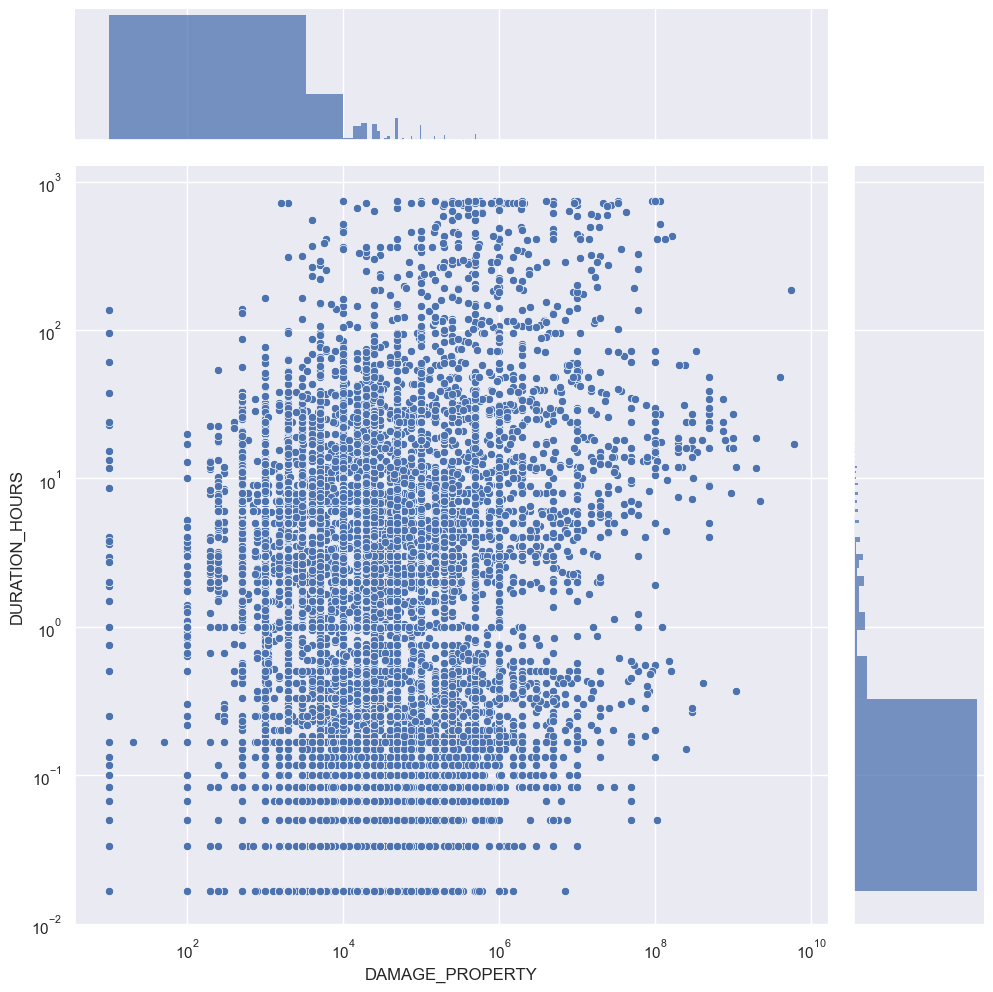

In [23]:
jointDF = pd.concat([pd.DataFrame(stormdata['DAMAGE_PROPERTY']), pd.DataFrame(stormdata['DURATION_HOURS'])], axis = 1).reindex(stormdata['DAMAGE_PROPERTY'].index)
# Draw jointplot of the two variables in the joined dataframe
# Create the jointplot
g = sb.jointplot(data=jointDF, x='DAMAGE_PROPERTY', y='DURATION_HOURS', height=10)

# Set log scales
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')

# Optional: adjust marginal plots if desired
g.ax_marg_x.set_xscale('log')
g.ax_marg_y.set_yscale('log')

plt.show()

In [90]:
# Drop rows in stormdata
#stormdata = stormdata[stormdata['DAMAGE_PROPERTY'] >= 50]
# Drop rows in data2024
#data2024 = data2024[data2024['DAMAGE_PROPERTY'] >=50]




------   NORMALIZING STARTS HERE



In [504]:
#Categorizing by event type
# For stormdata
stormdata_mg = stormdata[stormdata['MAGNITUDE_TYPE'] == 'MG']
stormdata_eg = stormdata[stormdata['MAGNITUDE_TYPE'] == 'EG']

# For data2024
data2024_mg = data2024[data2024['MAGNITUDE_TYPE'] == 'MG']
data2024_eg = data2024[data2024['MAGNITUDE_TYPE'] == 'EG']

categorical_columns = ['EVENT_TYPE', 'CZ_TYPE', 'BEGIN_DAY', 'BEGIN_TIME', 'MAGNITUDE_TYPE']
stormdata_mg = stormdata_mg.drop(columns=categorical_columns)
stormdata_eg = stormdata_eg.drop(columns=categorical_columns)

data2024_mg  = data2024_mg.drop(columns=categorical_columns)
data2024_eg  = data2024_eg.drop(columns=categorical_columns)


In [520]:
stormdatamag = stormdata_mg[stormdata_mg['DAMAGE_PROPERTY'] >= 100] #lower bound
stormdatamag2 = data2024_mg[data2024_mg['DAMAGE_PROPERTY'] >= 100]

In [522]:
stormdatamag.describe()

,STATE_FIPS,YEAR,CZ_FIPS,DAMAGE_PROPERTY,MAGNITUDE,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,DURATION_HOURS
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.0,66.0,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,30.575758,2019.681818,69.787879,3853.121212,57.090909,0.0,0.0,0.742424,0.848485,8.105820,-21.669253,8.110092,-21.633121,8.062374
std,15.437278,1.790222,115.702738,16841.769715,12.296000,0.0,0.0,2.531710,2.724490,15.841351,42.338027,15.848901,42.271739,10.126467
min,1.000000,2017.000000,1.000000,100.000000,32.000000,0.0,0.0,0.000000,0.000000,0.000000,-117.123900,0.000000,-116.750300,0.083333
25%,26.000000,2018.000000,7.000000,100.000000,48.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.750000
50%,31.000000,2020.000000,35.500000,200.000000,56.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.058333
75%,37.000000,2021.000000,73.000000,500.000000,62.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
max,85.000000,2022.000000,550.000000,100000.000000,91.000000,0.0,0.0,19.000000,19.000000,41.398600,0.000000,41.737800,0.000000,75.650000


In [524]:
stormdatamag.corr()

,STATE_FIPS,YEAR,CZ_FIPS,DAMAGE_PROPERTY,MAGNITUDE,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,DURATION_HOURS
STATE_FIPS,1.000000,0.055719,0.226041,0.226064,0.226741,NaN,NaN,0.350258,0.323269,0.037556,-0.018126,0.037291,-0.018213,-0.158893
YEAR,0.055719,1.000000,-0.033977,0.026971,-0.022428,NaN,NaN,0.069894,0.068820,0.060180,-0.034660,0.060060,-0.034618,0.082524
CZ_FIPS,0.226041,-0.033977,1.000000,-0.079694,0.195246,NaN,NaN,0.454323,0.434596,0.083315,-0.086074,0.083541,-0.086004,-0.007071
DAMAGE_PROPERTY,0.226064,0.026971,-0.079694,1.000000,-0.007299,NaN,NaN,-0.032106,-0.038828,-0.105297,0.104219,-0.105307,0.104193,0.115998
MAGNITUDE,0.226741,-0.022428,0.195246,-0.007299,1.000000,NaN,NaN,0.162864,0.232333,0.372347,-0.325322,0.372522,-0.324861,0.198696
TOR_LENGTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TOR_WIDTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BEGIN_RANGE,0.350258,0.069894,0.454323,-0.032106,0.162864,NaN,NaN,1.000000,0.904268,0.501605,-0.546269,0.501388,-0.546715,-0.228207
END_RANGE,0.323269,0.068820,0.434596,-0.038828,0.232333,NaN,NaN,0.904268,1.000000,0.542909,-0.582113,0.543136,-0.581966,-0.241337
BEGIN_LAT,0.037556,0.060180,0.083315,-0.105297,0.372347,NaN,NaN,0.501605,0.542909,1.000000,-0.984290,0.999993,-0.984094,-0.396956


In [526]:
stormdatamag2.describe()

,STATE_FIPS,YEAR,CZ_FIPS,DAMAGE_PROPERTY,MAGNITUDE,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,DURATION_HOURS
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.0,22.0,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,37.909091,2023.500000,53.090909,816.363636,64.272727,0.0,0.0,0.727273,1.045455,11.882041,-31.840068,11.933259,-31.775255,4.986364
std,13.183356,0.511766,67.194748,871.564250,10.470738,0.0,0.0,1.453463,1.914289,18.149159,48.183813,18.236124,48.075906,5.354508
min,4.000000,2023.000000,1.000000,100.000000,50.000000,0.0,0.0,0.000000,0.000000,0.000000,-114.583800,0.000000,-113.426100,0.016667
25%,32.000000,2023.000000,9.750000,150.000000,56.000000,0.0,0.0,0.000000,0.000000,0.000000,-90.980775,0.000000,-90.884400,0.716667
50%,42.000000,2023.500000,26.000000,350.000000,61.500000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000
75%,47.000000,2024.000000,61.750000,1412.500000,73.750000,0.0,0.0,1.000000,1.750000,30.692925,0.000000,30.861500,0.000000,8.650000
max,51.000000,2024.000000,235.000000,2800.000000,80.000000,0.0,0.0,6.000000,7.000000,46.650500,0.000000,47.216600,0.000000,17.000000


In [528]:
stormdatamag2.corr()

,STATE_FIPS,YEAR,CZ_FIPS,DAMAGE_PROPERTY,MAGNITUDE,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,DURATION_HOURS
STATE_FIPS,1.000000,-0.289379,-0.148032,-0.280146,-0.397904,NaN,NaN,-0.319453,-0.314940,-0.579389,0.555265,-0.579117,0.556132,0.388035
YEAR,-0.289379,1.000000,-0.134321,0.099287,0.222163,NaN,NaN,0.192055,0.218733,0.336914,-0.339863,0.337820,-0.339212,0.285572
CZ_FIPS,-0.148032,-0.134321,1.000000,-0.438533,0.310891,NaN,NaN,0.069502,0.264290,0.128212,-0.112136,0.128335,-0.111606,-0.181855
DAMAGE_PROPERTY,-0.280146,0.099287,-0.438533,1.000000,0.189318,NaN,NaN,-0.111336,-0.172000,-0.027902,0.021035,-0.028179,0.019712,0.279299
MAGNITUDE,-0.397904,0.222163,0.310891,0.189318,1.000000,NaN,NaN,0.408755,0.581404,0.490504,-0.462632,0.490394,-0.462344,-0.001573
TOR_LENGTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TOR_WIDTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BEGIN_RANGE,-0.319453,0.192055,0.069502,-0.111336,0.408755,NaN,NaN,1.000000,0.620797,0.787657,-0.769854,0.790148,-0.767131,-0.404129
END_RANGE,-0.314940,0.218733,0.264290,-0.172000,0.581404,NaN,NaN,0.620797,1.000000,0.793080,-0.795762,0.792716,-0.795738,-0.477362
BEGIN_LAT,-0.579389,0.336914,0.128212,-0.027902,0.490504,NaN,NaN,0.787657,0.793080,1.000000,-0.973823,0.999986,-0.973273,-0.551318


In [453]:
#encoding categorical columns and normalizing numerical columns
#categorical_columns = ['EVENT_TYPE', 'CZ_TYPE', 'BEGIN_DAY', 'BEGIN_TIME', 'MAGNITUDE_TYPE']
#stormdata = stormdata.drop(columns=categorical_columns)
#data2024 = data2024.drop(columns=categorical_columns)
#stormdata = pd.get_dummies(stormdata, columns=['EVENT_TYPE', 'CZ_TYPE'], drop_first=True) #one hot encoding categorical variables
#data2024 = pd.get_dummies(data2024, columns=['EVENT_TYPE', 'CZ_TYPE'], drop_first=True) #one hot encoding categorical variables
#drop_event_cols = [ 'EVENT_TYPE_Dust Devil', 'EVENT_TYPE_Freezing Fog', 'EVENT_TYPE_Frost/Freeze', 'EVENT_TYPE_Funnel Cloud', 'EVENT_TYPE_Heat', 'EVENT_TYPE_Rip Current', 'EVENT_TYPE_Seiche', 'EVENT_TYPE_Sleet', 'EVENT_TYPE_Waterspout', 'EVENT_TYPE_Marine Dense Fog', 'EVENT_TYPE_Marine Hail', 'EVENT_TYPE_Marine High Wind', 'EVENT_TYPE_Marine Hurricane/Typhoon', 'EVENT_TYPE_Marine Strong Wind', 'EVENT_TYPE_Marine Thunderstorm Wind', 'EVENT_TYPE_Marine Tropical Depression', 'EVENT_TYPE_Marine Tropical Storm']
#stormdata = stormdata.drop(columns=drop_event_cols)
#data2024 = data2024.drop(columns=drop_event_cols)

numerical_cols = stormdatamag.select_dtypes(include=['int64', 'float64']).columns.difference(['DAMAGE_PROPERTY'])
numerical_cols2 = stormdatamag2.select_dtypes(include=['int64', 'float64']).columns.difference(['DAMAGE_PROPERTY'])

# Step 2: Normalize numerical columns using (x - mean) / std
stormdata_normalized = stormdatamag.copy()
stormdata_normalized[numerical_cols] = (stormdatamag[numerical_cols] - stormdatamag[numerical_cols].mean()) / stormdatamag[numerical_cols].std()
stormdata_normalized.head(n=100)

data2024_normalized = stormdatamag2.copy()
data2024_normalized[numerical_cols] = (stormdatamag2[numerical_cols] - stormdatamag2[numerical_cols].mean()) / stormdatamag2[numerical_cols].std()




------   POST NORMALIZING AND ENCODING; POST CLEANING: DATA EXPLORATION



In [133]:
stormdata_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23257 entries, 29 to 268224
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   STATE_FIPS       23257 non-null  float64 
 1   YEAR             23257 non-null  float64 
 2   CZ_FIPS          23257 non-null  float64 
 3   DAMAGE_PROPERTY  23257 non-null  int32   
 4   MAGNITUDE        23257 non-null  float64 
 5   MAGNITUDE_TYPE   11330 non-null  category
 6   TOR_LENGTH       23257 non-null  float64 
 7   TOR_WIDTH        23257 non-null  float64 
 8   BEGIN_RANGE      23257 non-null  float64 
 9   END_RANGE        23257 non-null  float64 
 10  BEGIN_LAT        23257 non-null  float64 
 11  BEGIN_LON        23257 non-null  float64 
 12  END_LAT          23257 non-null  float64 
 13  END_LON          23257 non-null  float64 
 14  DURATION_HOURS   23257 non-null  float64 
dtypes: category(1), float64(13), int32(1)
memory usage: 2.6 MB


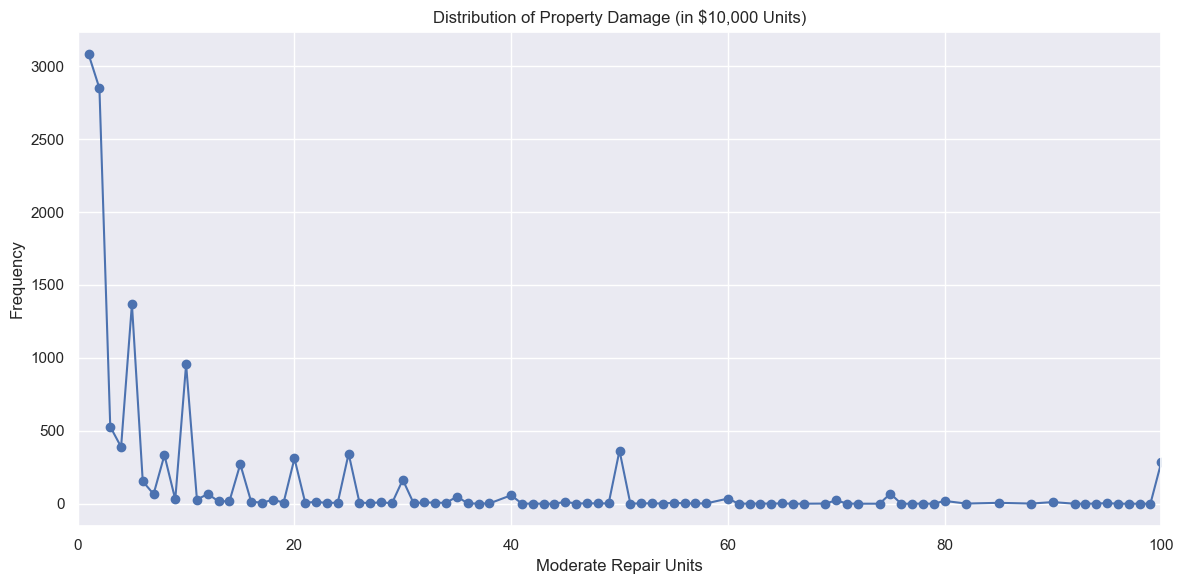

In [153]:
damage_counts = stormdata['DAMAGE_PROPERTY'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(damage_counts.index, damage_counts.values, marker='o', linestyle='-')
plt.title('Distribution of Property Damage (in $10,000 Units)')
plt.xlabel('Moderate Repair Units')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(0, 100)  # Optional zoom-in
plt.tight_layout()
plt.show()

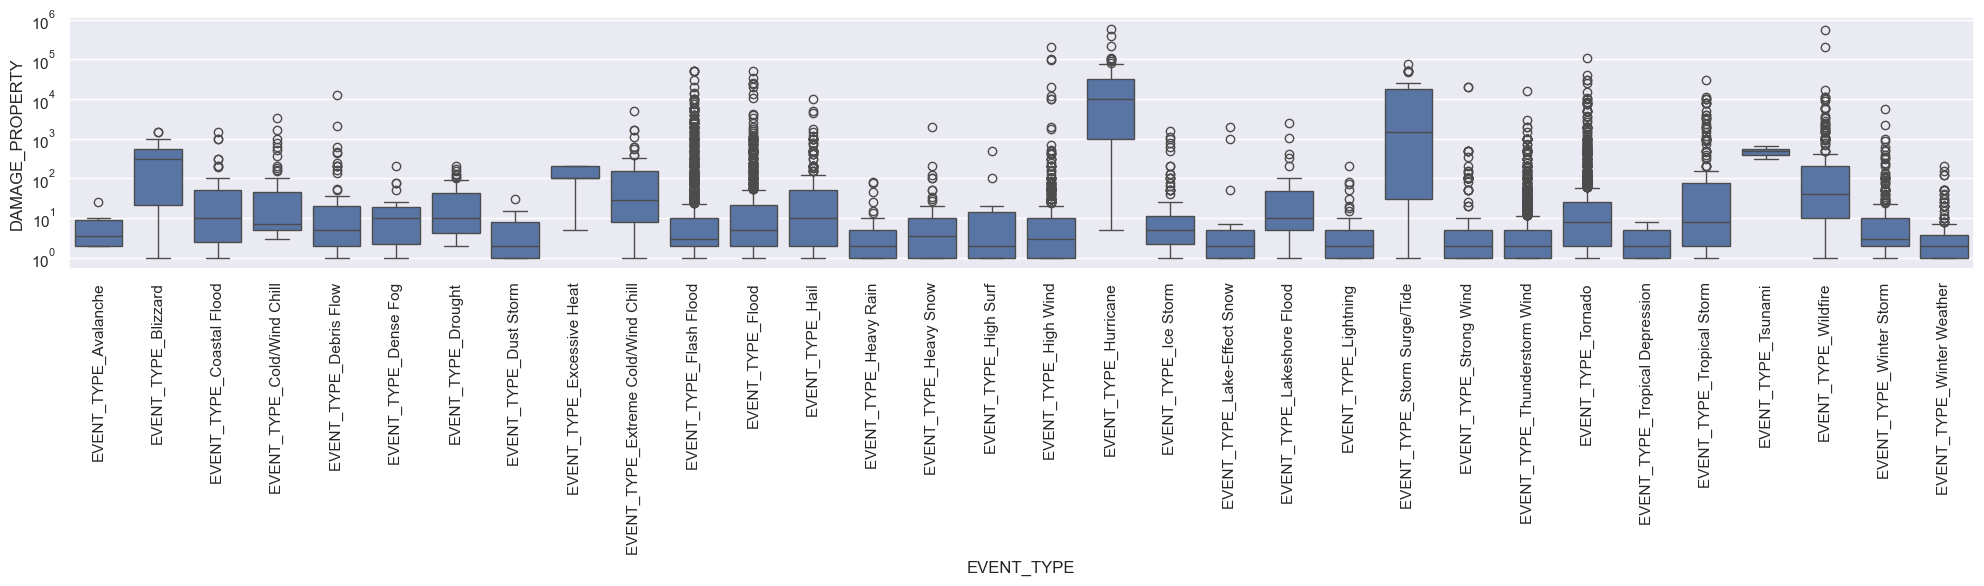

In [157]:
# Select all event type columns (assuming they start with "EVENT_TYPE_")
event_cols = [col for col in stormdata.columns if col.startswith('EVENT_TYPE_')]

# Melt them into long format (each row = one active event type)
melted = stormdata.melt(id_vars='DAMAGE_PROPERTY', value_vars=event_cols,
                        var_name='EVENT_TYPE', value_name='IS_EVENT')

# Filter only rows where the event is active (IS_EVENT == True)
melted = melted[melted['IS_EVENT'] == True]
plt.figure(figsize=(20, 6))
sb.boxplot(data=melted, x='EVENT_TYPE', y='DAMAGE_PROPERTY')
plt.yscale('log')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('storm_damage_boxplot.png', dpi=300)  # opens great in any image viewer
plt.show()

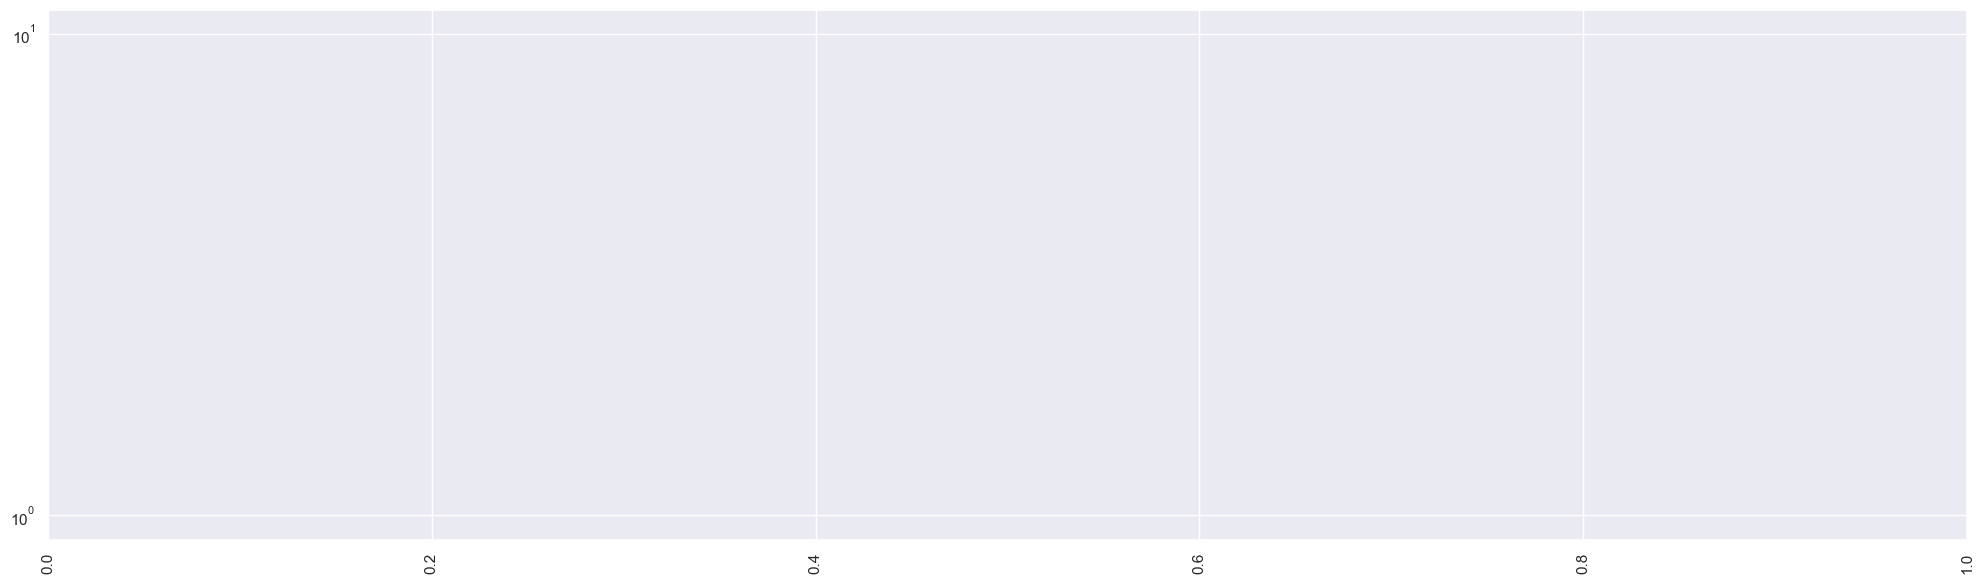

In [301]:
plt.figure(figsize=(20, 6))
#sb.boxplot(data=stormdatamag, x='MAGNITUDE_TYPE', y='DAMAGE_PROPERTY')
plt.yscale('log')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [303]:
stormdatamag.describe()

,STATE_FIPS,YEAR,CZ_FIPS,DAMAGE_PROPERTY,MAGNITUDE,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,DURATION_HOURS
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,46.555556,2021.111111,73.444444,26422.222222,58.777778,0.0,0.0,2.333333,2.333333,7.545356,-18.587089,7.545356,-18.587089,9.020370
std,19.099156,1.452966,179.151550,40500.054870,8.814445,0.0,0.0,6.284903,6.284903,15.176623,37.027821,15.176623,37.027821,7.581762
min,11.000000,2020.000000,1.000000,1800.000000,45.000000,0.0,0.0,0.000000,0.000000,0.000000,-90.194000,0.000000,-90.194000,0.183333
25%,41.000000,2020.000000,6.000000,2000.000000,53.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,47.000000,2020.000000,11.000000,10000.000000,57.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,53.000000,2023.000000,27.000000,12000.000000,65.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.416667
max,85.000000,2023.000000,550.000000,100000.000000,73.000000,0.0,0.0,19.000000,19.000000,38.917400,0.000000,38.917400,0.000000,18.816667


In [305]:
stormdatamag.corr()

,STATE_FIPS,YEAR,CZ_FIPS,DAMAGE_PROPERTY,MAGNITUDE,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,DURATION_HOURS
STATE_FIPS,1.000000,-0.295291,0.781488,0.019665,-0.143221,NaN,NaN,0.686598,0.686598,-0.116088,-0.128409,-0.116088,-0.128409,-0.154994
YEAR,-0.295291,1.000000,-0.039591,-0.513683,0.724425,NaN,NaN,0.022814,0.022814,0.398446,-0.315037,0.398446,-0.315037,-0.766159
CZ_FIPS,0.781488,-0.039591,1.000000,-0.194147,0.241977,NaN,NaN,0.989128,0.989128,0.505550,-0.704704,0.505550,-0.704704,-0.439913
DAMAGE_PROPERTY,0.019665,-0.513683,-0.194147,1.000000,-0.158324,NaN,NaN,-0.223869,-0.223869,-0.319590,0.317984,-0.319590,0.317984,0.412745
MAGNITUDE,-0.143221,0.724425,0.241977,-0.158324,1.000000,NaN,NaN,0.330939,0.330939,0.685748,-0.634842,0.685748,-0.634842,-0.801721
TOR_LENGTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TOR_WIDTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BEGIN_RANGE,0.686598,0.022814,0.989128,-0.223869,0.330939,NaN,NaN,1.000000,1.000000,0.616206,-0.793636,0.616206,-0.793636,-0.485157
END_RANGE,0.686598,0.022814,0.989128,-0.223869,0.330939,NaN,NaN,1.000000,1.000000,0.616206,-0.793636,0.616206,-0.793636,-0.485157
BEGIN_LAT,-0.116088,0.398446,0.505550,-0.319590,0.685748,NaN,NaN,0.616206,0.616206,1.000000,-0.968204,1.000000,-0.968204,-0.638531


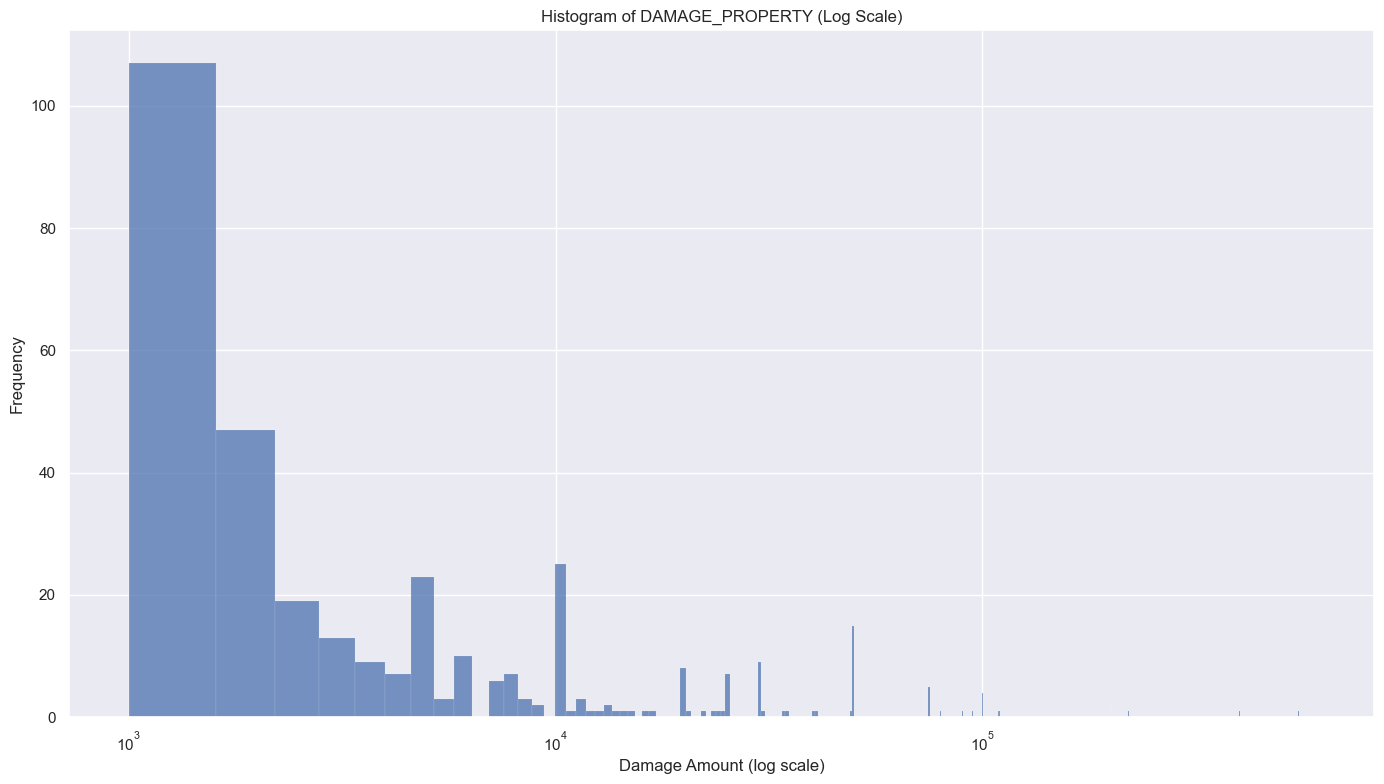

In [237]:
plt.figure(figsize=(14, 8))  # Made the plot larger
sb.histplot(data=stormdatamag, x='DAMAGE_PROPERTY', bins=1000, kde=False)

plt.xscale('log')  # Log scale for better visibility of skewed data
plt.title('Histogram of DAMAGE_PROPERTY (Log Scale)')
plt.xlabel('Damage Amount (log scale)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [97]:
most_frequent_value = stormdatamag['DAMAGE_PROPERTY'].value_counts().idxmax()
most_frequent_count = stormdatamag['DAMAGE_PROPERTY'].value_counts().max()

print(f"The most frequent DAMAGE_PROPERTY value is: {most_frequent_value}")
print(f"It appears {most_frequent_count} times.")

The most frequent DAMAGE_PROPERTY value is: 1000
It appears 72 times.


In [99]:
categorical_columns = ['EVENT_TYPE', 'CZ_TYPE', 'MAGNITUDE_TYPE']
stormdatamagnum = stormdatamag.drop(columns=categorical_columns)

In [101]:
stormdatamagnum.corr()

,BEGIN_DAY,BEGIN_TIME,STATE_FIPS,YEAR,CZ_FIPS,DAMAGE_PROPERTY,MAGNITUDE,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,DURATION_HOURS
BEGIN_DAY,1.000000,0.087722,-0.135054,-0.007180,0.134906,0.108890,0.014973,0.007596,-0.003465,-0.122754,-0.133485,-0.215326,0.172074,-0.214795,0.172333,-0.327395
BEGIN_TIME,0.087722,1.000000,0.069703,-0.016263,0.032145,-0.094893,0.220396,0.142026,0.112576,-0.039223,-0.037138,0.290763,-0.244029,0.291466,-0.243787,-0.385654
STATE_FIPS,-0.135054,0.069703,1.000000,-0.017403,0.215788,0.011468,0.112443,-0.017659,-0.013736,0.000170,-0.032937,0.022398,0.039899,0.022973,0.039932,-0.037043
YEAR,-0.007180,-0.016263,-0.017403,1.000000,-0.031771,-0.058267,0.194371,0.155418,0.031921,0.041544,0.043274,0.337267,-0.334934,0.336984,-0.334521,0.118284
CZ_FIPS,0.134906,0.032145,0.215788,-0.031771,1.000000,-0.105279,0.020570,0.027082,-0.002715,0.014424,0.018715,0.018537,-0.017876,0.018771,-0.017597,-0.058099
DAMAGE_PROPERTY,0.108890,-0.094893,0.011468,-0.058267,-0.105279,1.000000,-0.008586,-0.038682,-0.037005,-0.053980,-0.059587,-0.195692,0.187969,-0.195729,0.187955,-0.038441
MAGNITUDE,0.014973,0.220396,0.112443,0.194371,0.020570,-0.008586,1.000000,-0.096540,-0.078439,0.006422,-0.000427,0.127465,-0.097331,0.127469,-0.097334,-0.119518
TOR_LENGTH,0.007596,0.142026,-0.017659,0.155418,0.027082,-0.038682,-0.096540,1.000000,0.761711,0.036969,0.058771,0.281889,-0.303577,0.283551,-0.302052,-0.138176
TOR_WIDTH,-0.003465,0.112576,-0.013736,0.031921,-0.002715,-0.037005,-0.078439,0.761711,1.000000,0.035470,0.066035,0.212944,-0.246195,0.214255,-0.245074,-0.112321
BEGIN_RANGE,-0.122754,-0.039223,0.000170,0.041544,0.014424,-0.053980,0.006422,0.036969,0.035470,1.000000,0.967957,0.295238,-0.287436,0.294923,-0.287762,0.161653


In [ ]:
plt.figure(figsize=(20, 6))
stormdatanomag = stormdatanomag[stormdatanomag['DAMAGE_PROPERTY'] >= 100000]
sb.boxplot(data=stormdatanomag, x='EVENT_TYPE', y='DAMAGE_PROPERTY')
plt.yscale('log')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('storm_damage_boxplot.png', dpi=300)  # opens great in any image viewer
plt.show()

In [ ]:



------   XGBOOST TESTING



In [530]:
#Yall probably don't need this block so you can delete this portion maybe except for denzel, can just start from here
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X_train = stormdata_normalized.drop(columns=['DAMAGE_PROPERTY'], errors='ignore')
y_train = stormdata_normalized['DAMAGE_PROPERTY']
y_train_log = np.log1p(y_train)


model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, max_depth=6, learning_rate=0.0005, random_state=42)
model.fit(X_train, y_train_log)


#comparing with train data
y_pred_train = model.predict(X_train)
y_pred_train = np.expm1(y_pred_train)
rmse = mean_squared_error(y_train, y_pred_train, squared=False)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {rmse:.2f}")
print(f"Train MAE: {mae:.2f}")
print(f"Train R²: {r2:.4f}")

#comparing with test data
X_test = data2024_normalized.drop(columns=['DAMAGE_PROPERTY'], errors='ignore')
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
y_test = data2024_normalized['DAMAGE_PROPERTY']
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)

# Step 4: Evaluate
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(f"\n🧪 Test Set Performance (2024):")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAE: {mae_test:.2f}")
print(f"R²: {r2_test:.4f}")

Train RMSE: 18296.92
Train MAE: 4168.17
Train R²: -0.0238

🧪 Test Set Performance (2024):
RMSE: 1122.83
MAE: 705.10
R²: -0.4547


C:\Users\heins\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\heins\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [331]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# ---------------------------
# 1. Data Preparation & Consistency
# ---------------------------
# Assume stormdata_normalized and data2024_normalized are already loaded as DataFrames.
# Define the feature set (all columns except the target)

X_train = stormdata_normalized.drop(columns=['DAMAGE_PROPERTY'], errors='ignore')
y_train = stormdata_normalized['DAMAGE_PROPERTY']


# Optional: Remove outliers based on target quantiles (e.g., keep data between the 1st and 99th percentiles)
lower_bound = y_train.quantile(0.01)
upper_bound = y_train.quantile(0.99)
mask = (y_train >= lower_bound) & (y_train <= upper_bound)
X_train_clean = X_train[mask]
y_train_clean = y_train[mask]

# Apply a log1p transformation to handle skewness in the target variable
y_train_log = np.log1p(y_train_clean)

# ---------------------------
# 2. Build a Pipeline with Consistent Preprocessing
# ---------------------------
# Even if your data are normalized, using a pipeline ensures that the same scaling is applied to the test set.
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
])

# ---------------------------
# 3. Hyperparameter Tuning with GridSearchCV
# ---------------------------
param_grid = {
    'xgb__n_estimators': [500, 1000],
    'xgb__max_depth': list(range(3, 11)),
    'xgb__learning_rate': [0.1, 0.01]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_clean, y_train_log)
print("Best parameters found:", grid_search.best_params_)

# Retrieve the best model
best_model = grid_search.best_estimator_

# ---------------------------
# 4. Evaluate on Training Data
# ---------------------------
# Predict on the training data (using the cleaned dataset)
y_pred_train_log = best_model.predict(X_train_clean)
y_pred_train = np.expm1(y_pred_train_log)  # revert the log transformation

rmse_train = mean_squared_error(y_train_clean, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train_clean, y_pred_train)
r2_train = r2_score(y_train_clean, y_pred_train)

print(f"Train RMSE: {rmse_train:.2f}")
print(f"Train MAE: {mae_train:.2f}")
print(f"Train R²: {r2_train:.4f}")

# ---------------------------
# 5. Prepare and Evaluate on Test Data
# ---------------------------
# Ensure the test data uses the same feature columns as training.
X_test = data2024_normalized.drop(columns=['DAMAGE_PROPERTY'], errors='ignore')
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
# Fill any missing values in the test set (using the mean of training features as an example)
X_test = X_test.fillna(X_train_clean.mean())
y_test = data2024_normalized['DAMAGE_PROPERTY']

# Predict and revert the log transformation
y_pred_test_log = best_model.predict(X_test)
y_pred_test = np.expm1(y_pred_test_log)

rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTest Set Performance (2024):")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAE: {mae_test:.2f}")
print(f"R²: {r2_test:.4f}")

Fitting 3 folds for each of 32 candidates, totalling 96 fits


C:\Users\heins\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\heins\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\heins\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
C:\Users\heins\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\heins\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\heins\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in

Best parameters found: {'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 500}
Train RMSE: 6536.03
Train MAE: 2583.60
Train R²: 0.9558

Test Set Performance (2024):
RMSE: 1899.45
MAE: 1434.82
R²: -5.9154


C:\Users\heins\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\heins\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\heins\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
C:\Users\heins\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\heins\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error

In [518]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
# -----------------------------
# Step 1: Prepare Training Data
# -----------------------------
X_train = stormdata_normalized.drop(columns=['DAMAGE_PROPERTY'], errors='ignore')
y_train = stormdata_normalized['DAMAGE_PROPERTY']
y_train_binary = (y_train > 0).astype(int)
y_train_log = np.log1p(y_train[y_train > 0])
X_train_reg = X_train[y_train > 0]

# -----------------------------
# Step 2: Prepare Test Data
# -----------------------------
X_test = data2024_normalized.drop(columns=['DAMAGE_PROPERTY'], errors='ignore')
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
y_test = data2024_normalized['DAMAGE_PROPERTY']
y_test_binary = (y_test > 0).astype(int)
X_test_reg_actual = X_test[y_test > 0]
y_test_reg_actual = y_test[y_test > 0]

# -----------------------------
# Step 3: Train Binary Classifier
# -----------------------------
clf_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42
)
clf_model.fit(X_train, y_train_binary)

# -----------------------------
# Step 4: Hyperparameter Tuning (Regressor)
# -----------------------------
param_dist = {
    'n_estimators': [500, 1000, 1500],
    'learning_rate': [0.01, 0.005, 0.002],
    'max_depth': range(4, 11),
    'subsample': [0.6, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 0.9, 1.0]
}

reg_search = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)
reg_search.fit(X_train_reg, y_train_log)
reg_model = reg_search.best_estimator_

# -----------------------------
# Step 5: Predict on Test Data
# -----------------------------
damage_probs = clf_model.predict_proba(X_test)[:, 1]
will_damage = damage_probs > 0.5
X_test_pred_damage = X_test[will_damage]

y_pred_log = reg_model.predict(X_test_pred_damage)
y_pred_damage = np.expm1(y_pred_log)

y_pred_combined = np.zeros_like(y_test.values)
y_pred_combined[will_damage] = y_pred_damage

# -----------------------------
# Step 6: Evaluation
# -----------------------------
print("🔍 Binary Classifier Performance:")
print("Accuracy:", accuracy_score(y_test_binary, will_damage))
print("AUROC:", roc_auc_score(y_test_binary, damage_probs))

print("\n💥 Regression Performance (on damage cases):")
rmse = mean_squared_error(y_test_reg_actual, y_pred_combined[y_test > 0], squared=False)
mae = mean_absolute_error(y_test_reg_actual, y_pred_combined[y_test > 0])
r2 = r2_score(y_test_reg_actual, y_pred_combined[y_test > 0])

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

print("\n✅ Best Hyperparameters (Regressor):")
print(reg_search.best_params_)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0], got [1]